In [1]:

import time
import pandas as pd
import glob
import numpy as np
import timeit
import pickle
import ast

from multiprocessing import Pool
from matplotlib import pyplot as plt
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

# import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})

path_dicts='/mnt/sdb1/sandeep/dicts_chess/'

# with open(file_to_read) as f:
#     exec(f.read())
    
# import ast


In [2]:
start_time = timeit.default_timer()

p=Pool(processes=15)

names=path_dicts+"parquets/dict_full_careers*"
files=sorted(glob.glob(names))
df_careers = pd.concat(p.map(pd.read_parquet,files),ignore_index=True)
p.close()
print('loaded careers=',toc(start_time))

643.0621071830392
loaded careers= None


In [2]:
# t_ic=time.time()

# file_to_read = open(path_dicts+"dict_CHESS_CAREERS_ALL_YEARS"+".pkl", "rb")
# dict_career_MAIN= pickle.load(file_to_read)

# t_oc=time.time();
# print(t_oc-t_ic,' seconds')

905.0046441555023  seconds


In [3]:
df_careers.head()

,player_id,event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_,termination_
0,BFG9k,Rated Classical game,600+8,BFG9k,mamalak,1-0,2012.12.31,23:01:03,1639,1403,French Defense: Normal Variation,1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6...,Normal
1,BFG9k,Rated Classical game,600+8,BFG9k,Sagaz,0-1,2012.12.31,23:07:33,1644,1544,Modern Defense,1. e4 g6 2. d4 d6 3. Nf3 c6 4. h3 Nf6 5. Bg5 N...,Normal
2,BFG9k,Rated Classical game,600+8,BFG9k,hes166,1-0,2013.01.01,13:35:40,1628,1344,Pirc Defense #2,1. e4 d6 2. d4 Nf6 3. Nc3 e5 4. d5 Bd7 5. Bg5 ...,Time forfeit
3,BFG9k,Rated Classical game,600+8,BFG9k,adepa,0-1,2013.01.01,13:54:43,1633,1705,Caro-Kann Defense: Advance Variation,1. e4 c6 2. d4 d5 3. e5 Bf5 4. h3 e6 5. Nf3 a6...,Normal
4,BFG9k,Rated Classical game,600+8,BFG9k,erg57,1-0,2013.01.02,22:55:13,1623,1860,Bishop's Opening: Boi Variation,1. e4 e5 2. Bc4 Bc5 3. d3 Qf6 4. Nf3 h6 5. Nc3...,Normal


In [25]:
career_lens=df_careers.groupby(['player_id']).count()

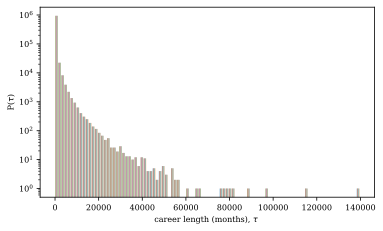

In [27]:

fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);

ax.hist(career_lens,100);

# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel=r"career length (months), $\tau$ ", ylabel=r'P($\tau$)');
ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));


In [36]:
sum(np.array(career_lens)>500)

array([92864, 92864, 92864, 92864, 92864, 92864, 92864, 92864, 92864,
       92864, 92864, 92864])

In [46]:
ids=np.array(df_careers['player_id'])


In [ ]:
ind=np.where(~(ids[1:ids.shape[0]]==ids[0:ids.shape[0]-1]))

fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);

ax.plot(ind);


In [56]:
ind

(array([     3670,      3893,      3949, ..., 246158031, 246158032,
        246158053]),)

In [7]:
df_careers['player_id'].nunique()

978868

In [106]:
from datetime import datetime

t_ic=time.time()
LL=len(dict_career_MAIN.keys())
cc=0


store_career_duration=[]

for key_ in dict_career_MAIN:
    career_=dict_career_MAIN[key_]
    cc=cc+1;
# 
    len_career=len(career_)
    if len_career>=100:
        it=0
        date_time_it=career_[it][5]+' '+career_[it][6]
        t0_ = datetime.strptime(date_time_it, '%Y.%m.%d %H:%M:%S')

        it=len_career-1
        date_time_it=career_[it][5]+' '+career_[it][6]
        t1_ = datetime.strptime(date_time_it, '%Y.%m.%d %H:%M:%S')

        store_career_duration.append(t1_-t0_)

        if cc % 10000 == 0:
            t_oc = time.time();
            print('done=','-----',cc/LL)
            with open("/mnt/sdb1/sandeep/0. Careers in chess/0.progress_career_dur.txt", "a") as file_object:
                file_object.write(str(cc/LL)+'--i.e.-'+str(cc)+'/'+str(LL)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')



done= ----- 0.051079410094108706
done= ----- 0.1941017583576131
done= ----- 0.275828814508187
done= ----- 0.33712410662111747
done= ----- 0.3984193987340479
done= ----- 0.40863528075286965
done= ----- 0.4188511627716914
done= ----- 0.4494988088281566
done= ----- 0.4699305728658001
done= ----- 0.510794100941087
done= ----- 0.5210099829599087
done= ----- 0.5414417469975523
done= ----- 0.5823052750728392
done= ----- 0.592521157091661
done= ----- 0.6027370391104827
done= ----- 0.6436005671857696
done= ----- 0.6640323312234132
done= ----- 0.7151117413175219
done= ----- 0.7559752693928088
done= ----- 0.7661911514116305
done= ----- 0.9296452637127784


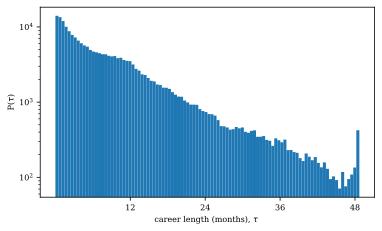

In [125]:
fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);
def datetime_to_float(d):
#     epoch = datetime.utcfromtimestamp(0)
    total_seconds =  (d).total_seconds()/3600/24/30
    # total_seconds will be in decimals (millisecond precision)
    return total_seconds
X=[datetime_to_float(x) for x in store_career_duration]
ax.hist(X,100);

# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel=r"career length (months), $\tau$ ", ylabel=r'P($\tau$)');
ax.set_yscale('log',base=10)
ax.set_xticks(np.linspace(12,48,4));
